## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
#Carregamento dos dados
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#Identificando dados ausentes
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
#Dropando as linhas com dados ausentes pois significam apenas 0,1% dos dados
housing= df.dropna()

In [5]:
#Selecionando apenas as variaveis quantitativas para a matriz de correlacao
california_housing = housing.select_dtypes(include =['number'])
california_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [6]:
# Matriz de Correlação
california_housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


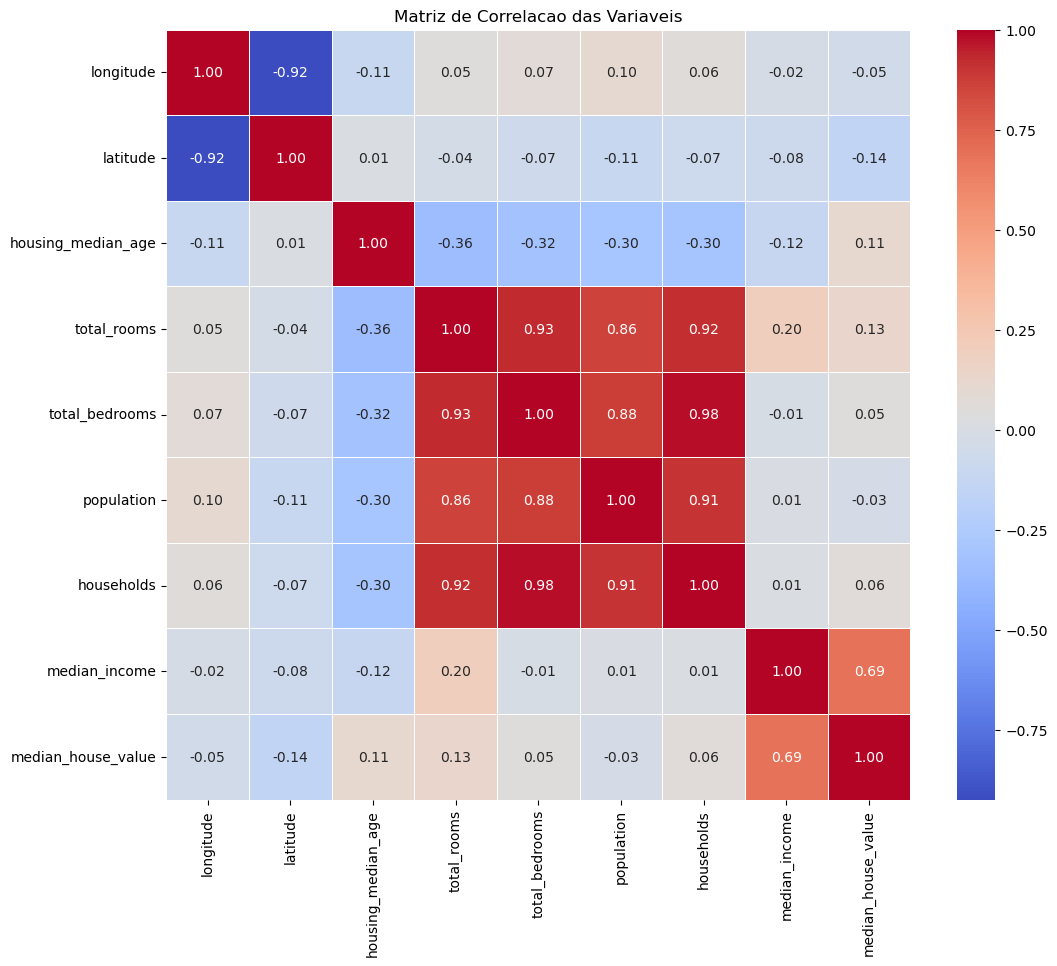

In [7]:
#Heatmap da matriz de correlaçao
corr_matrix = california_housing.corr()

plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlacao das Variaveis')
plt.show()

In [8]:
#Separação dos dados de treinamento e teste
X = california_housing.drop('median_house_value', axis=1)
y = california_housing['median_house_value']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [10]:
#Treinamento da arvore com profundidade 8
regr_1 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [11]:
#Treinamento da arvore com profundidade 2
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [12]:
#Calculo do MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes
#Previsões para a base de treinamento
y_train_pred1 = regr_1.predict(X_train)
y_train_pred2 = regr_2.predict(X_train)

#Previsões para o conjunto de teste
y_test_pred1 = regr_1.predict(X_test)
y_test_pred2 = regr_2.predict(X_test)

#Calculo do MSE da base de treinamento
mse_train1 = mean_squared_error(y_train, y_train_pred1)
mse_train2 = mean_squared_error(y_train, y_train_pred2)

template = "O MSE da árvore com profundidade={0} para a base {1} é: {2:.2f}"
# Imprimir os resultados para a base de treinamento
print(template.format(regr_1.get_depth(), "de treinamento", mse_train1).replace(".", ","))
print(template.format(regr_2.get_depth(), "de treinamento", mse_train2).replace(".", ","))

#Calculo do MSE da base de testes
mse_test1 = mean_squared_error(y_test, y_test_pred1)
mse_test2 = mean_squared_error(y_test, y_test_pred2)

# Imprimir os resultados para a base de teste
print(template.format(regr_1.get_depth(), "de teste", mse_test1).replace(".", ","))
print(template.format(regr_2.get_depth(), "de teste", mse_test2).replace(".", ","))

O MSE da árvore com profundidade=8 para a base de treinamento é: 3303971158,65
O MSE da árvore com profundidade=2 para a base de treinamento é: 7330289644,64
O MSE da árvore com profundidade=8 para a base de teste é: 4255779627,89
O MSE da árvore com profundidade=2 para a base de teste é: 7499488454,95


**Foi analisado que a a arvore mais adequada é a de profundidade de 8**, por possuir um menor MSE e com relativamente proximo entre a base de treinamento e base de teste.

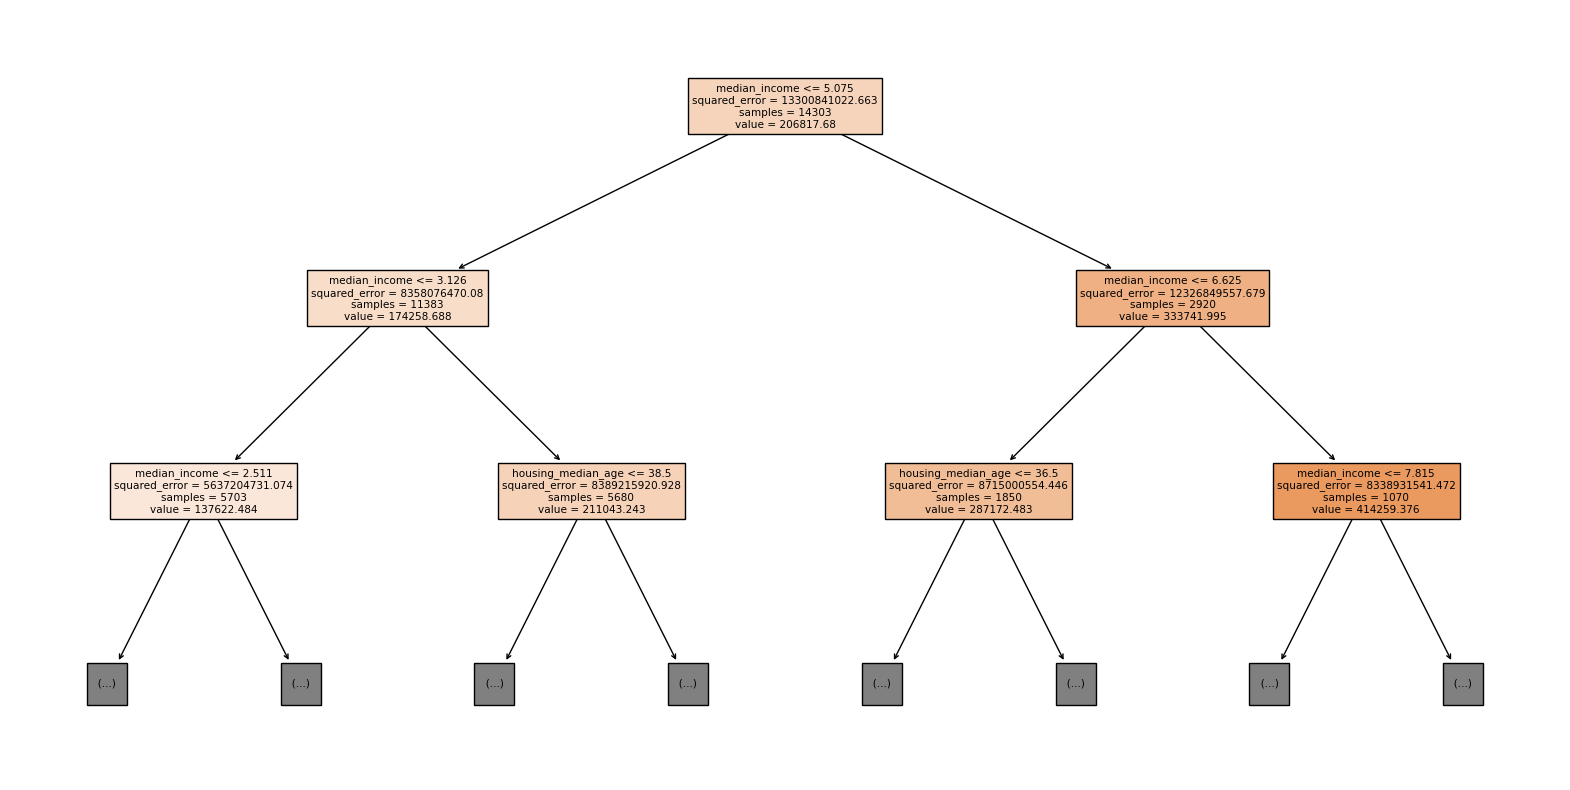

In [13]:
#Visualizao grafica da arvore
plt.rc('figure', figsize=(20,10))
tp = tree.plot_tree(regr_1,
                   max_depth=2,
                   feature_names=X.columns.tolist(),
                   filled=True)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [14]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train)
path


{'ccp_alphas': array([0.00000000e+00, 3.43020695e+04, 3.46867790e+04, 4.11118297e+04,
        4.20891887e+04, 8.99863665e+04, 1.32845091e+05, 1.67094388e+05,
        2.14018137e+05, 2.16477779e+05, 2.28390314e+05, 2.39824068e+05,
        2.40259369e+05, 2.67644900e+05, 2.83317914e+05, 2.84045530e+05,
        3.06565522e+05, 3.20829197e+05, 3.45528211e+05, 3.49357121e+05,
        3.59819826e+05, 4.02225507e+05, 4.02385514e+05, 4.17225002e+05,
        4.63648747e+05, 4.88843608e+05, 5.03390897e+05, 5.37782776e+05,
        5.73351103e+05, 5.80536596e+05, 6.01639000e+05, 6.33713440e+05,
        7.89543462e+05, 7.93475145e+05, 7.95197066e+05, 8.42564613e+05,
        9.19463229e+05, 9.92836992e+05, 1.00893893e+06, 1.01760546e+06,
        1.02961748e+06, 1.04914101e+06, 1.06697572e+06, 1.13951416e+06,
        1.18505755e+06, 1.21320398e+06, 1.22345244e+06, 1.27589562e+06,
        1.27835397e+06, 1.35645886e+06, 1.37554144e+06, 1.37820551e+06,
        1.50565401e+06, 1.50622760e+06, 1.52368512

Text(0, 0.5, 'Impureza total das folhas')

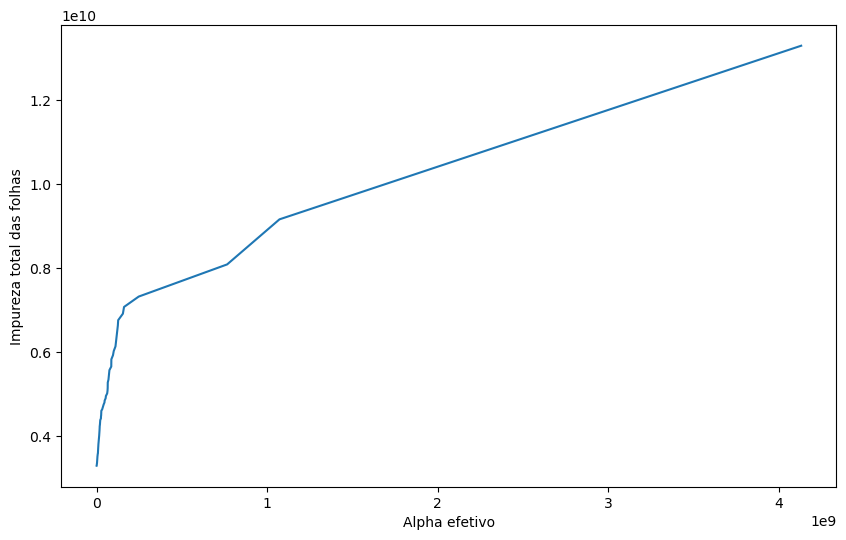

In [15]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [16]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=100, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

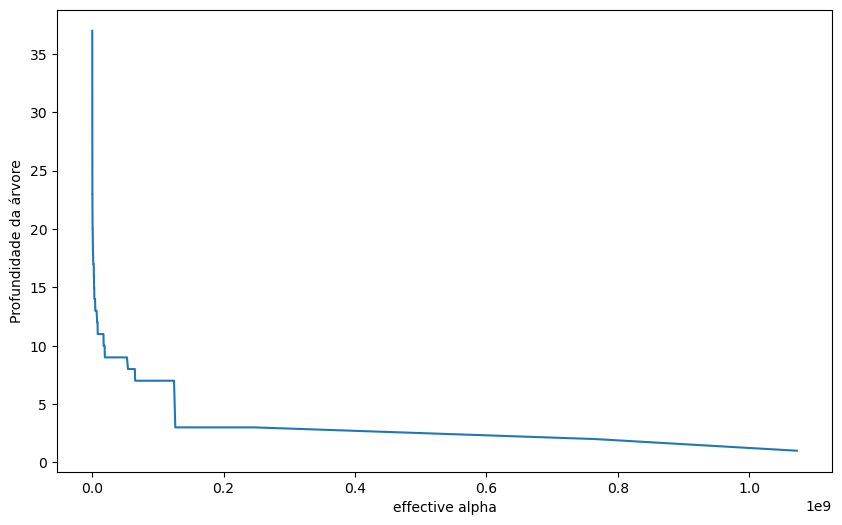

In [17]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [18]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

print(train_scores)
print(test_scores)


[0.0, 50246978.42955963, 50868408.96240393, 61894409.5561669, 63391249.792468615, 134158172.61913303, 194297455.83698186, 238742153.65939313, 309417273.02741855, 312000999.40012485, 329592916.91790086, 348569298.56746733, 349049801.5921408, 385213346.9738891, 402042958.51931393, 402326329.58365935, 426033106.9613557, 442047548.4510386, 468968442.1679039, 471055791.0656893, 488427149.60082304, 529555378.2986954, 529957763.81222403, 542328600.3028377, 600772530.1627587, 623502832.4182221, 637892443.7299649, 676452966.9644233, 712052457.7433956, 717819338.3511541, 739046350.3531997, 766967003.2483078, 879281906.8223823, 881660383.597509, 882455580.6632787, 937148714.7637217, 996807760.3407191, 1067160634.7381715, 1078167779.7347488, 1081216369.8557024, 1088384455.8552146, 1097753805.0058227, 1108354367.0046153, 1157840511.0332305, 1199838401.6988614, 1221411700.8693848, 1227512026.0974913, 1264914020.489995, 1266190560.0271547, 1321937169.883776, 1342402646.2380877, 1347906970.687445, 142

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

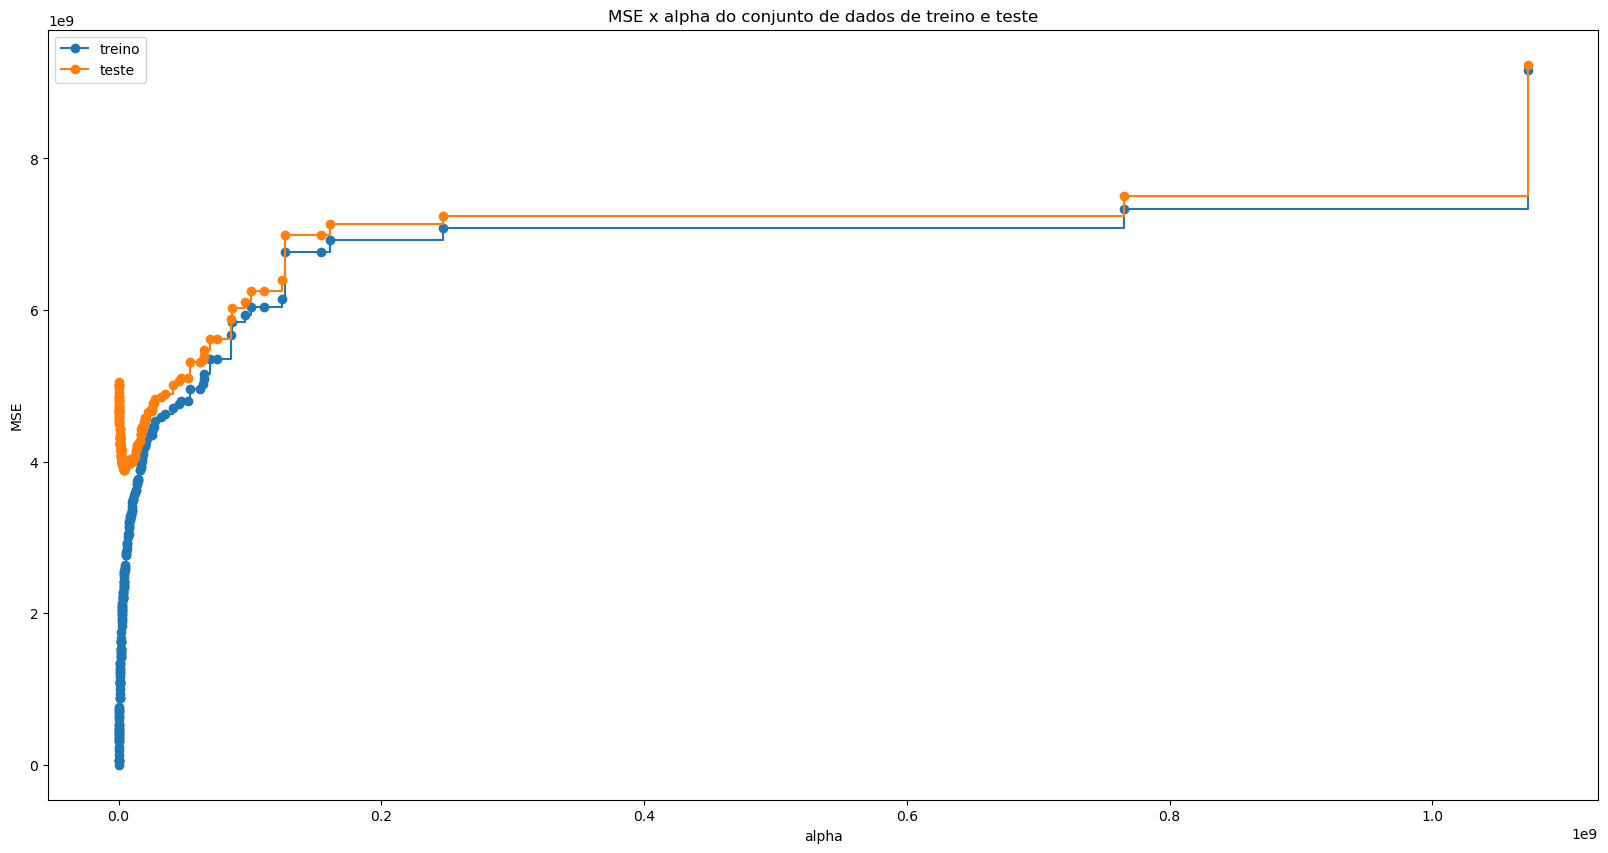

In [19]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

O valor de alpha escolhido perto do minimo MSE é 0.1.

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [20]:
arvore_final = DecisionTreeRegressor(random_state=100, ccp_alpha=.01)
arvore_final.fit(X_train, y_train)

print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f'R-quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}')


Profundidade: 37
R-quadrado na base de testes: 0.62
MSE na base de testes: 5043942837.96


### 7. Visualize esta árvore.

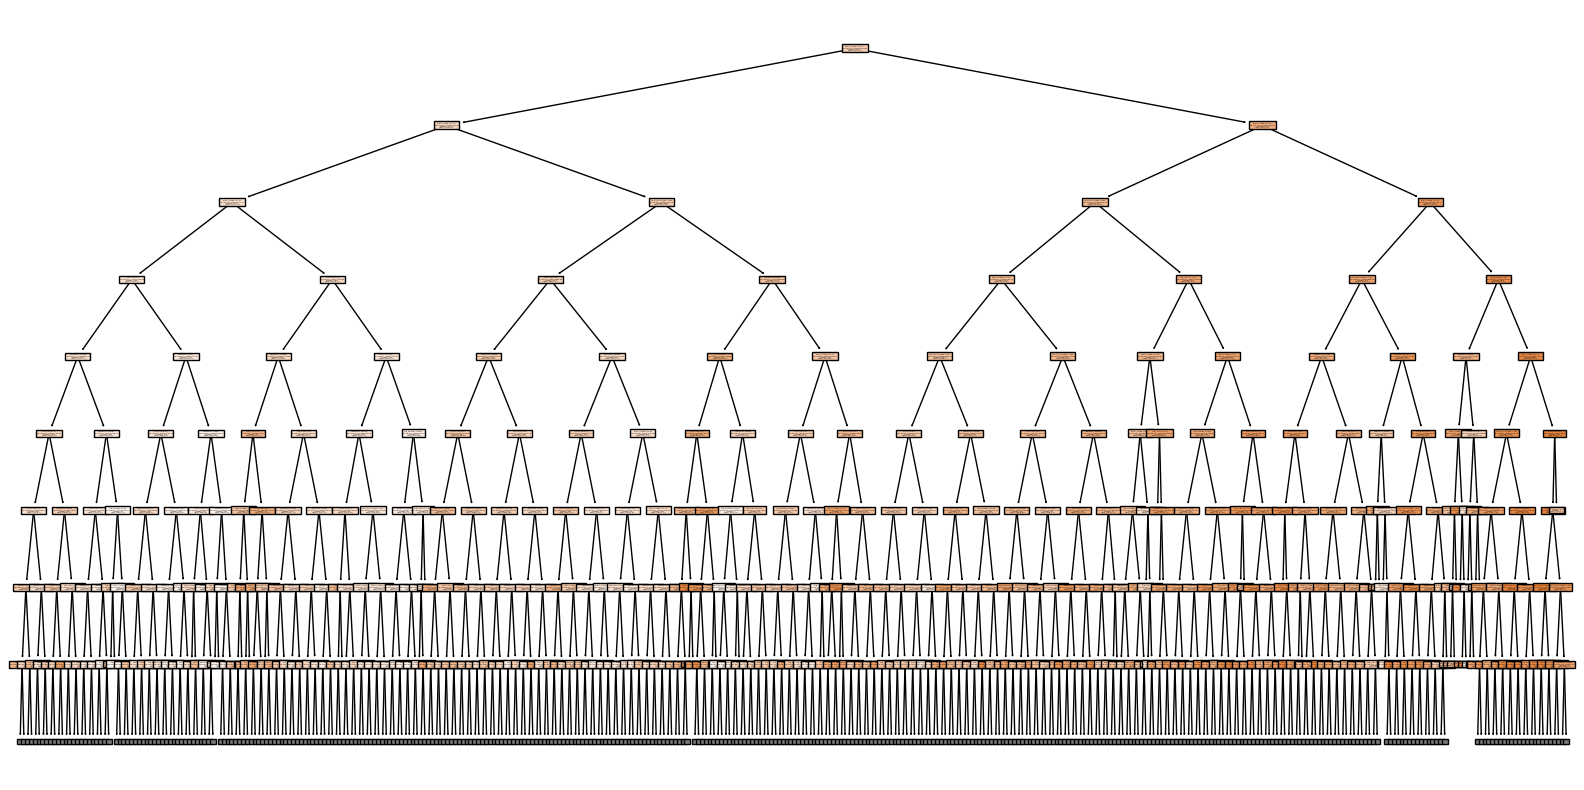

In [25]:
#Visualizao grafica da arvore
plt.rc('figure', figsize=(20,10))
tp = tree.plot_tree(arvore_final,
                   max_depth=8,
                   feature_names=X.columns.tolist(),
                   filled=True)